In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
guj_df = pd.read_csv(r"C:\Users\Divanshi\Downloads\8th sem project\NEW PROJECT\DATASETS\using\guj-wind-dataset.csv")

krntk_df = pd.read_csv(r"C:\Users\Divanshi\Downloads\8th sem project\NEW PROJECT\DATASETS\using\kar-wind-dataset.csv")


In [3]:
guj_df

,YEAR,MO,DY,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M,RH2M,T2M
0,2021,1,1,100.96,3.70,4.48,3.00,1.48,153.12,5.88,7.59,3.23,4.37,138.38,43.94,13.32
1,2021,1,2,100.95,4.05,5.83,3.25,2.58,279.31,6.47,7.45,3.88,3.58,264.50,45.31,13.48
2,2021,1,3,100.88,3.80,4.98,2.94,2.05,108.50,5.96,7.20,3.62,3.58,93.62,48.38,13.44
3,2021,1,4,100.82,3.38,4.09,2.43,1.66,177.69,5.24,6.91,3.40,3.50,178.06,56.12,14.05
4,2021,1,5,100.98,4.02,5.88,3.17,2.71,194.06,6.29,7.11,4.78,2.34,194.06,65.19,15.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,101.17,3.45,6.27,1.04,5.23,167.69,5.13,8.75,1.05,7.70,167.69,39.06,20.89
1123,2024,1,29,101.17,2.68,4.20,1.72,2.48,301.56,4.20,6.41,1.94,4.48,301.62,69.06,22.83
1124,2024,1,30,101.05,3.16,4.79,1.34,3.45,289.25,4.66,7.07,1.45,5.63,289.56,68.00,23.66
1125,2024,1,31,100.94,4.09,6.64,2.49,4.15,261.44,6.02,7.65,4.66,2.98,261.56,74.69,22.82


In [4]:
krntk_df

,YEAR,MO,DY,T2M,RH2M,PS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WD10M,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,WD50M
0,2021,1,1,19.34,80.56,93.81,4.21,6.21,2.74,3.47,96.19,6.52,7.48,5.44,2.04,96.19
1,2021,1,2,19.66,81.06,93.79,4.02,5.99,2.45,3.55,100.44,6.27,7.48,4.66,2.84,101.00
2,2021,1,3,22.01,81.50,93.65,3.35,5.52,1.77,3.76,113.94,5.24,6.66,3.47,3.20,114.12
3,2021,1,4,22.39,81.31,93.64,3.19,5.14,1.73,3.41,113.38,4.88,6.52,2.96,3.56,113.62
4,2021,1,5,21.54,84.25,93.71,2.41,4.49,0.68,3.81,98.25,3.89,5.53,0.91,4.62,98.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2024,1,28,21.49,70.31,94.12,3.64,5.75,1.93,3.82,98.69,5.80,7.52,3.16,4.36,98.44
1123,2024,1,29,21.32,70.19,94.04,3.25,5.02,1.89,3.12,93.12,5.43,7.69,2.81,4.88,93.19
1124,2024,1,30,21.77,65.38,93.98,2.52,4.63,1.00,3.63,168.31,3.98,7.36,1.01,6.35,167.75
1125,2024,1,31,21.95,68.38,93.98,1.95,3.48,0.44,3.05,217.44,2.88,5.56,0.59,4.98,216.81


In [5]:
# Step 1: Convert YEAR, MO, DY to datetime for both datasets
guj_df['datetime'] = pd.to_datetime(guj_df.assign(DAY=guj_df['DY'], MONTH=guj_df['MO'], YEAR=guj_df['YEAR']).loc[:, ['YEAR','MONTH','DAY']])
krntk_df['datetime'] = pd.to_datetime(krntk_df.assign(DAY=krntk_df['DY'], MONTH=krntk_df['MO'], YEAR=krntk_df['YEAR']).loc[:, ['YEAR','MONTH','DAY']])

# Step 2: Dropping original YEAR, MO, DY columns as we now have a combined datetime column
guj_df.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)
krntk_df.drop(['YEAR', 'MO', 'DY'], axis=1, inplace=True)

# Correcting the normalization process for the selected features
features_to_scale = ['PS', 'T2M', 'WS10M']
scaler = MinMaxScaler(feature_range=(0, 1))
guj_df[features_to_scale] = scaler.fit_transform(guj_df[features_to_scale])
krntk_df[features_to_scale] = scaler.fit_transform(krntk_df[features_to_scale])

# Creating lag features for wind speed at 10 meters (WS10M)
guj_df['WS10M_lag1'] = guj_df['WS10M'].shift(1)
krntk_df['WS10M_lag1'] = krntk_df['WS10M'].shift(1)

# Step 4 & 5: Prepare datasets for model training and split them
X_guj = guj_df.drop(['WS10M', 'datetime', 'WS10M_lag1'], axis=1)
y_guj = guj_df['WS10M']
X_krntk = krntk_df.drop(['WS10M', 'datetime', 'WS10M_lag1'], axis=1)
y_krntk = krntk_df['WS10M']

X_train_guj, X_test_guj, y_train_guj, y_test_guj = train_test_split(X_guj, y_guj, test_size=0.2, random_state=42)
X_train_krntk, X_test_krntk, y_train_krntk, y_test_krntk = train_test_split(X_krntk, y_krntk, test_size=0.2, random_state=42)



# Checking if the steps are correctly executed
(guj_df.head(), krntk_df.head())


(         PS     WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE   WD10M  WS50M  \
 0  0.815603  0.221957       4.48       3.00         1.48  153.12   5.88   
 1  0.812057  0.249801       5.83       3.25         2.58  279.31   6.47   
 2  0.787234  0.229912       4.98       2.94         2.05  108.50   5.96   
 3  0.765957  0.196500       4.09       2.43         1.66  177.69   5.24   
 4  0.822695  0.247414       5.88       3.17         2.71  194.06   6.29   
 
    WS50M_MAX  WS50M_MIN  WS50M_RANGE   WD50M   RH2M       T2M   datetime  \
 0       7.59       3.23         4.37  138.38  43.94  0.000000 2021-01-01   
 1       7.45       3.88         3.58  264.50  45.31  0.007329 2021-01-02   
 2       7.20       3.62         3.58   93.62  48.38  0.005497 2021-01-03   
 3       6.91       3.40         3.50  178.06  56.12  0.033440 2021-01-04   
 4       7.11       4.78         2.34  194.06  65.19  0.083830 2021-01-05   
 
    WS10M_lag1  
 0         NaN  
 1    0.221957  
 2    0.249801  
 3    0.22

In [6]:
# # Step 1: Convert YEAR, MO, DY to datetime for both datasets
# guj_df['datetime'] = pd.to_datetime(guj_df.assign(DAY=guj_df['DY'], MONTH=guj_df['MO'], YEAR=guj_df['YEAR']).loc[:, ['YEAR','MONTH','DAY']])
# krntk_df['datetime'] = pd.to_datetime(krntk_df.assign(DAY=krntk_df['DY'], MONTH=krntk_df['MO'], YEAR=krntk_df['YEAR']).loc[:, ['YEAR','MONTH','DAY']])


guj_df['Year'] = guj_df['datetime'].dt.year
guj_df['Month'] = guj_df['datetime'].dt.month
guj_df['DAY'] = guj_df['datetime'].dt.month
krntk_df['Year'] = krntk_df['datetime'].dt.year
krntk_df['Month'] = krntk_df['datetime'].dt.month 
krntk_df['DAY'] = krntk_df['datetime'].dt.month
# Step 2: Dropping original YEAR, MO, DY columns as we now have a combined datetime column
guj_df.drop(['Year', 'Month', 'DAY'], axis=1, inplace=True)
krntk_df.drop(['Year', 'Month', 'DAY'], axis=1, inplace=True)


# Adjust features_to_scale to include 'WS50M' instead of 'WS10M'
features_to_scale = ['PS', 'T2M', 'WS50M']
scaler = MinMaxScaler(feature_range=(0, 1))

# Apply normalization for 'WS50M' along with other features
guj_df[features_to_scale] = scaler.fit_transform(guj_df[features_to_scale])
krntk_df[features_to_scale] = scaler.fit_transform(krntk_df[features_to_scale])

# Creating lag features for wind speed at 50 meters (WS50M)
guj_df['WS50M_lag1'] = guj_df['WS50M'].shift(1)
krntk_df['WS50M_lag1'] = krntk_df['WS50M'].shift(1)

# Prepare datasets for model training by dropping 'WS50M' instead of 'WS10M'
X_guj = guj_df.drop(['WS50M', 'datetime', 'WS50M_lag1'], axis=1)
y_guj = guj_df['WS50M']
X_krntk = krntk_df.drop(['WS50M', 'datetime', 'WS50M_lag1'], axis=1)
y_krntk = krntk_df['WS50M']

# Continue with the train-test split as before
X_train_guj, X_test_guj, y_train_guj, y_test_guj = train_test_split(X_guj, y_guj, test_size=0.2, random_state=42)
X_train_krntk, X_test_krntk, y_train_krntk, y_test_krntk = train_test_split(X_krntk, y_krntk, test_size=0.2, random_state=42) 

# Checking if the steps are correctly executed
(guj_df.head(), krntk_df.head())



(         PS     WS10M  WS10M_MAX  WS10M_MIN  WS10M_RANGE   WD10M     WS50M  \
 0  0.815603  0.221957       4.48       3.00         1.48  153.12  0.306271   
 1  0.812057  0.249801       5.83       3.25         2.58  279.31  0.345215   
 2  0.787234  0.229912       4.98       2.94         2.05  108.50  0.311551   
 3  0.765957  0.196500       4.09       2.43         1.66  177.69  0.264026   
 4  0.822695  0.247414       5.88       3.17         2.71  194.06  0.333333   
 
    WS50M_MAX  WS50M_MIN  WS50M_RANGE   WD50M   RH2M       T2M   datetime  \
 0       7.59       3.23         4.37  138.38  43.94  0.000000 2021-01-01   
 1       7.45       3.88         3.58  264.50  45.31  0.007329 2021-01-02   
 2       7.20       3.62         3.58   93.62  48.38  0.005497 2021-01-03   
 3       6.91       3.40         3.50  178.06  56.12  0.033440 2021-01-04   
 4       7.11       4.78         2.34  194.06  65.19  0.083830 2021-01-05   
 
    WS10M_lag1  WS50M_lag1  
 0         NaN         NaN  
 1

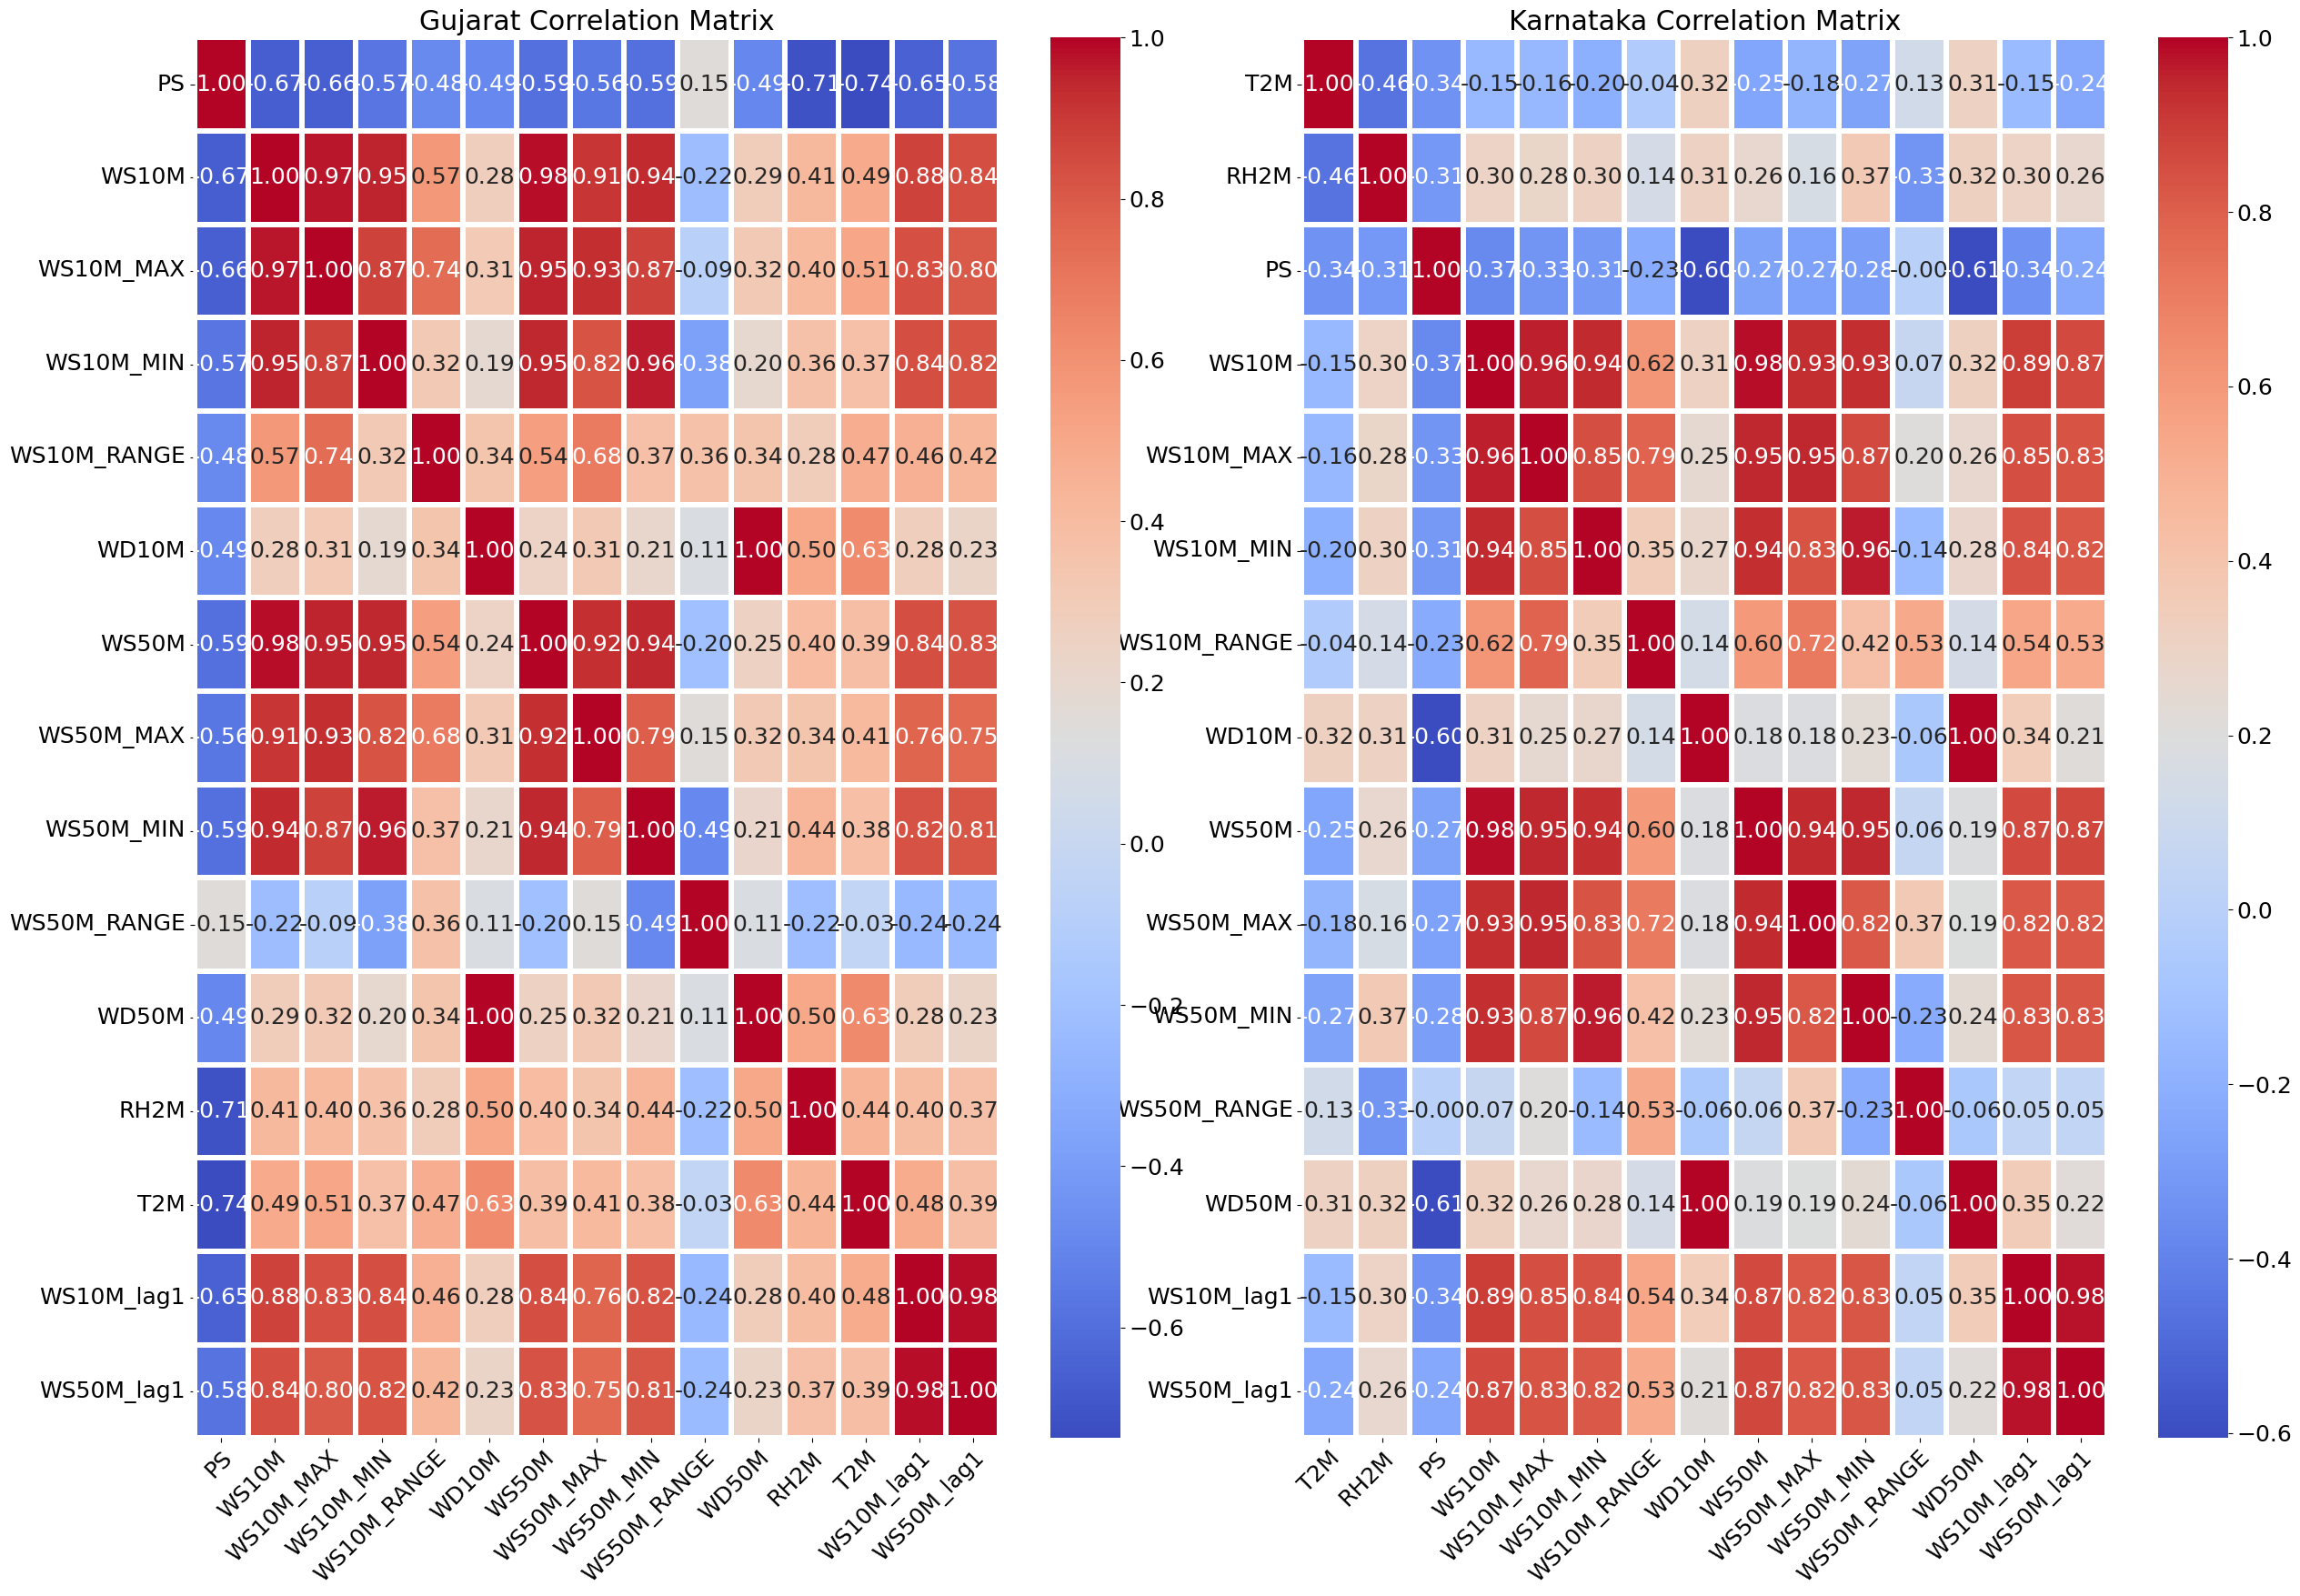

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjusting global plot settings for larger fonts
plt.rcParams.update({'font.size': 18})

# Correlation Matrix for Gujarat and Karnataka
fig, axes = plt.subplots(1, 2, figsize=(30, 20))  # Making the figure larger
fig.subplots_adjust(hspace=0.1, wspace=0.1)

# Correlation Matrix for Gujarat with thicker lines
sns.heatmap(guj_df.drop(['datetime'], axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=3, ax=axes[0])
axes[0].set_title('Gujarat Correlation Matrix')
plt.setp(axes[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[0].get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")

# Correlation Matrix for Karnataka with thicker lines
sns.heatmap(krntk_df.drop(['datetime'], axis=1).corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=3, ax=axes[1])
axes[1].set_title('Karnataka Correlation Matrix')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.setp(axes[1].get_yticklabels(), rotation=0, ha="right", rotation_mode="anchor")

plt.show()


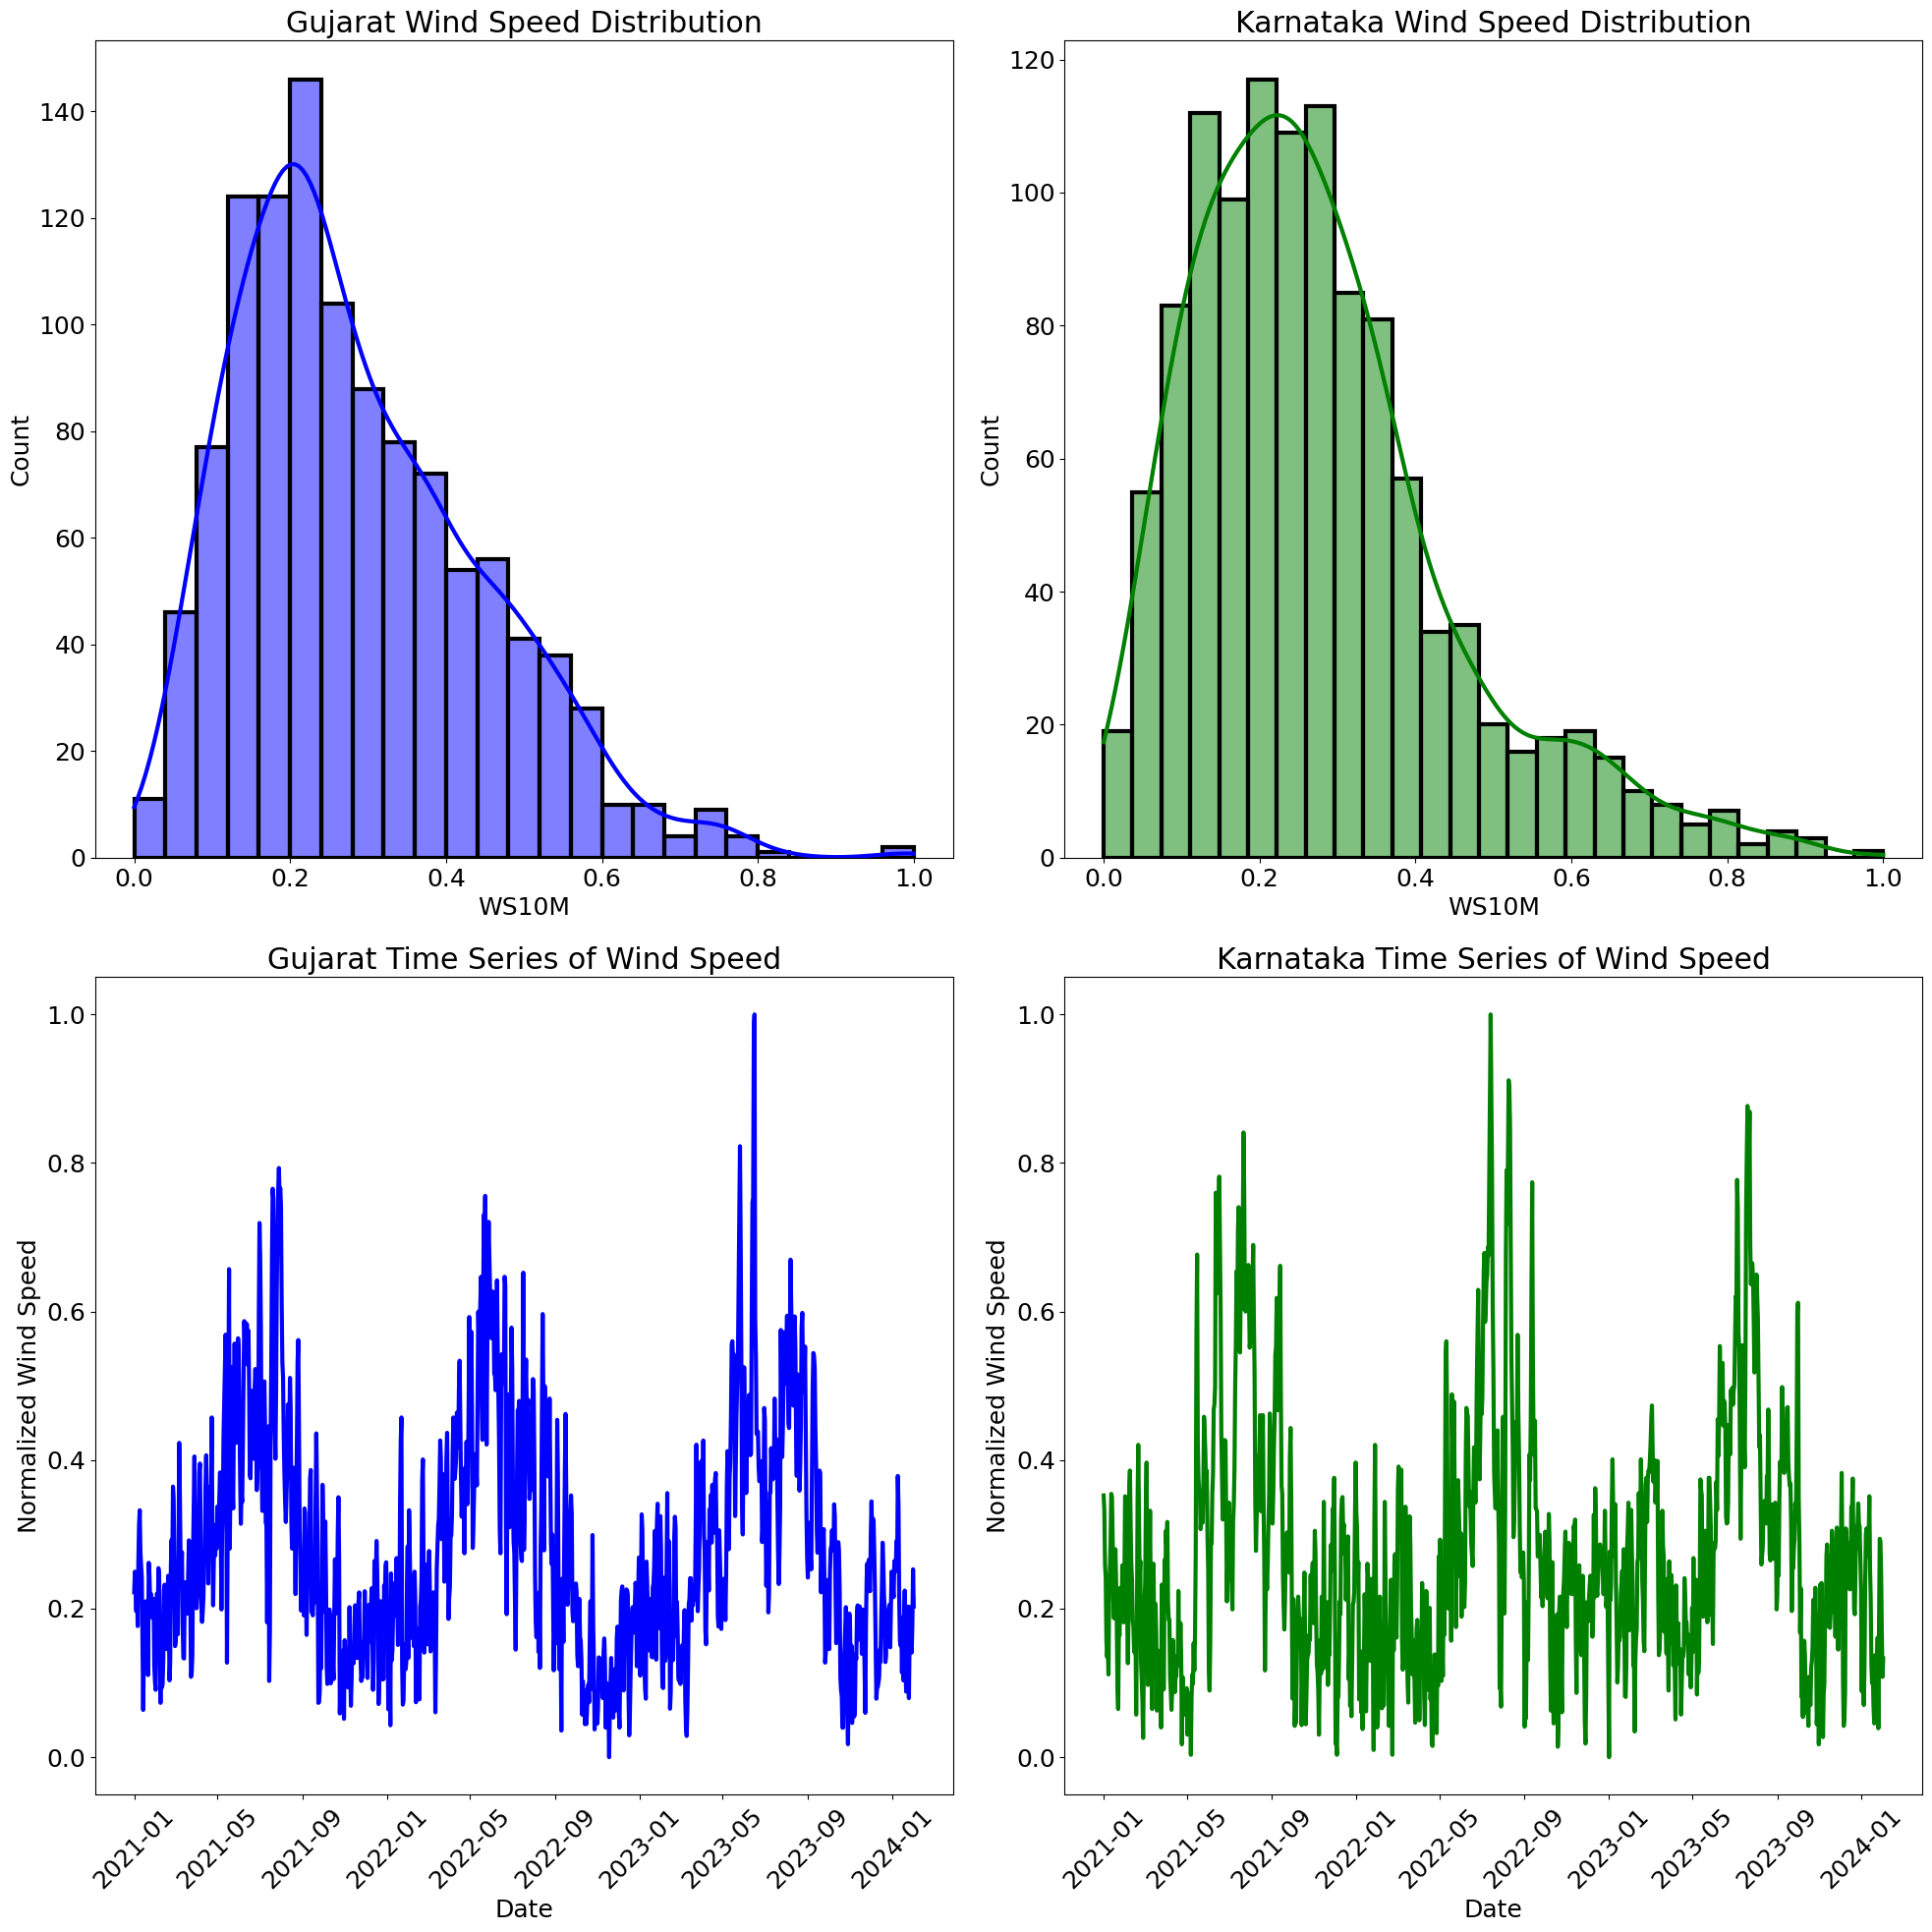

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust global settings for a larger font and line widths
plt.rcParams.update({'font.size': 18, 'lines.linewidth': 3})

# Setting up the figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # Increase figure size for better readability
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Wind Speed Distribution for Gujarat with KDE
sns.histplot(guj_df['WS10M'], ax=axes[0, 0], kde=True, color='blue', linewidth=3)
axes[0, 0].set_title('Gujarat Wind Speed Distribution')

# Wind Speed Distribution for Karnataka with KDE
sns.histplot(krntk_df['WS10M'], ax=axes[0, 1], kde=True, color='green', linewidth=3)
axes[0, 1].set_title('Karnataka Wind Speed Distribution')

# Time Series of Wind Speed for Gujarat
axes[1, 0].plot(guj_df['datetime'], guj_df['WS10M'], color='blue')
axes[1, 0].set_title('Gujarat Time Series of Wind Speed')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Normalized Wind Speed')
axes[1, 0].tick_params(axis='x', rotation=45)

# Time Series of Wind Speed for Karnataka
axes[1, 1].plot(krntk_df['datetime'], krntk_df['WS10M'], color='green')
axes[1, 1].set_title('Karnataka Time Series of Wind Speed')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Normalized Wind Speed')
axes[1, 1].tick_params(axis='x', rotation=45)

# Apply tight layout
plt.tight_layout()

# Show plot
plt.show()


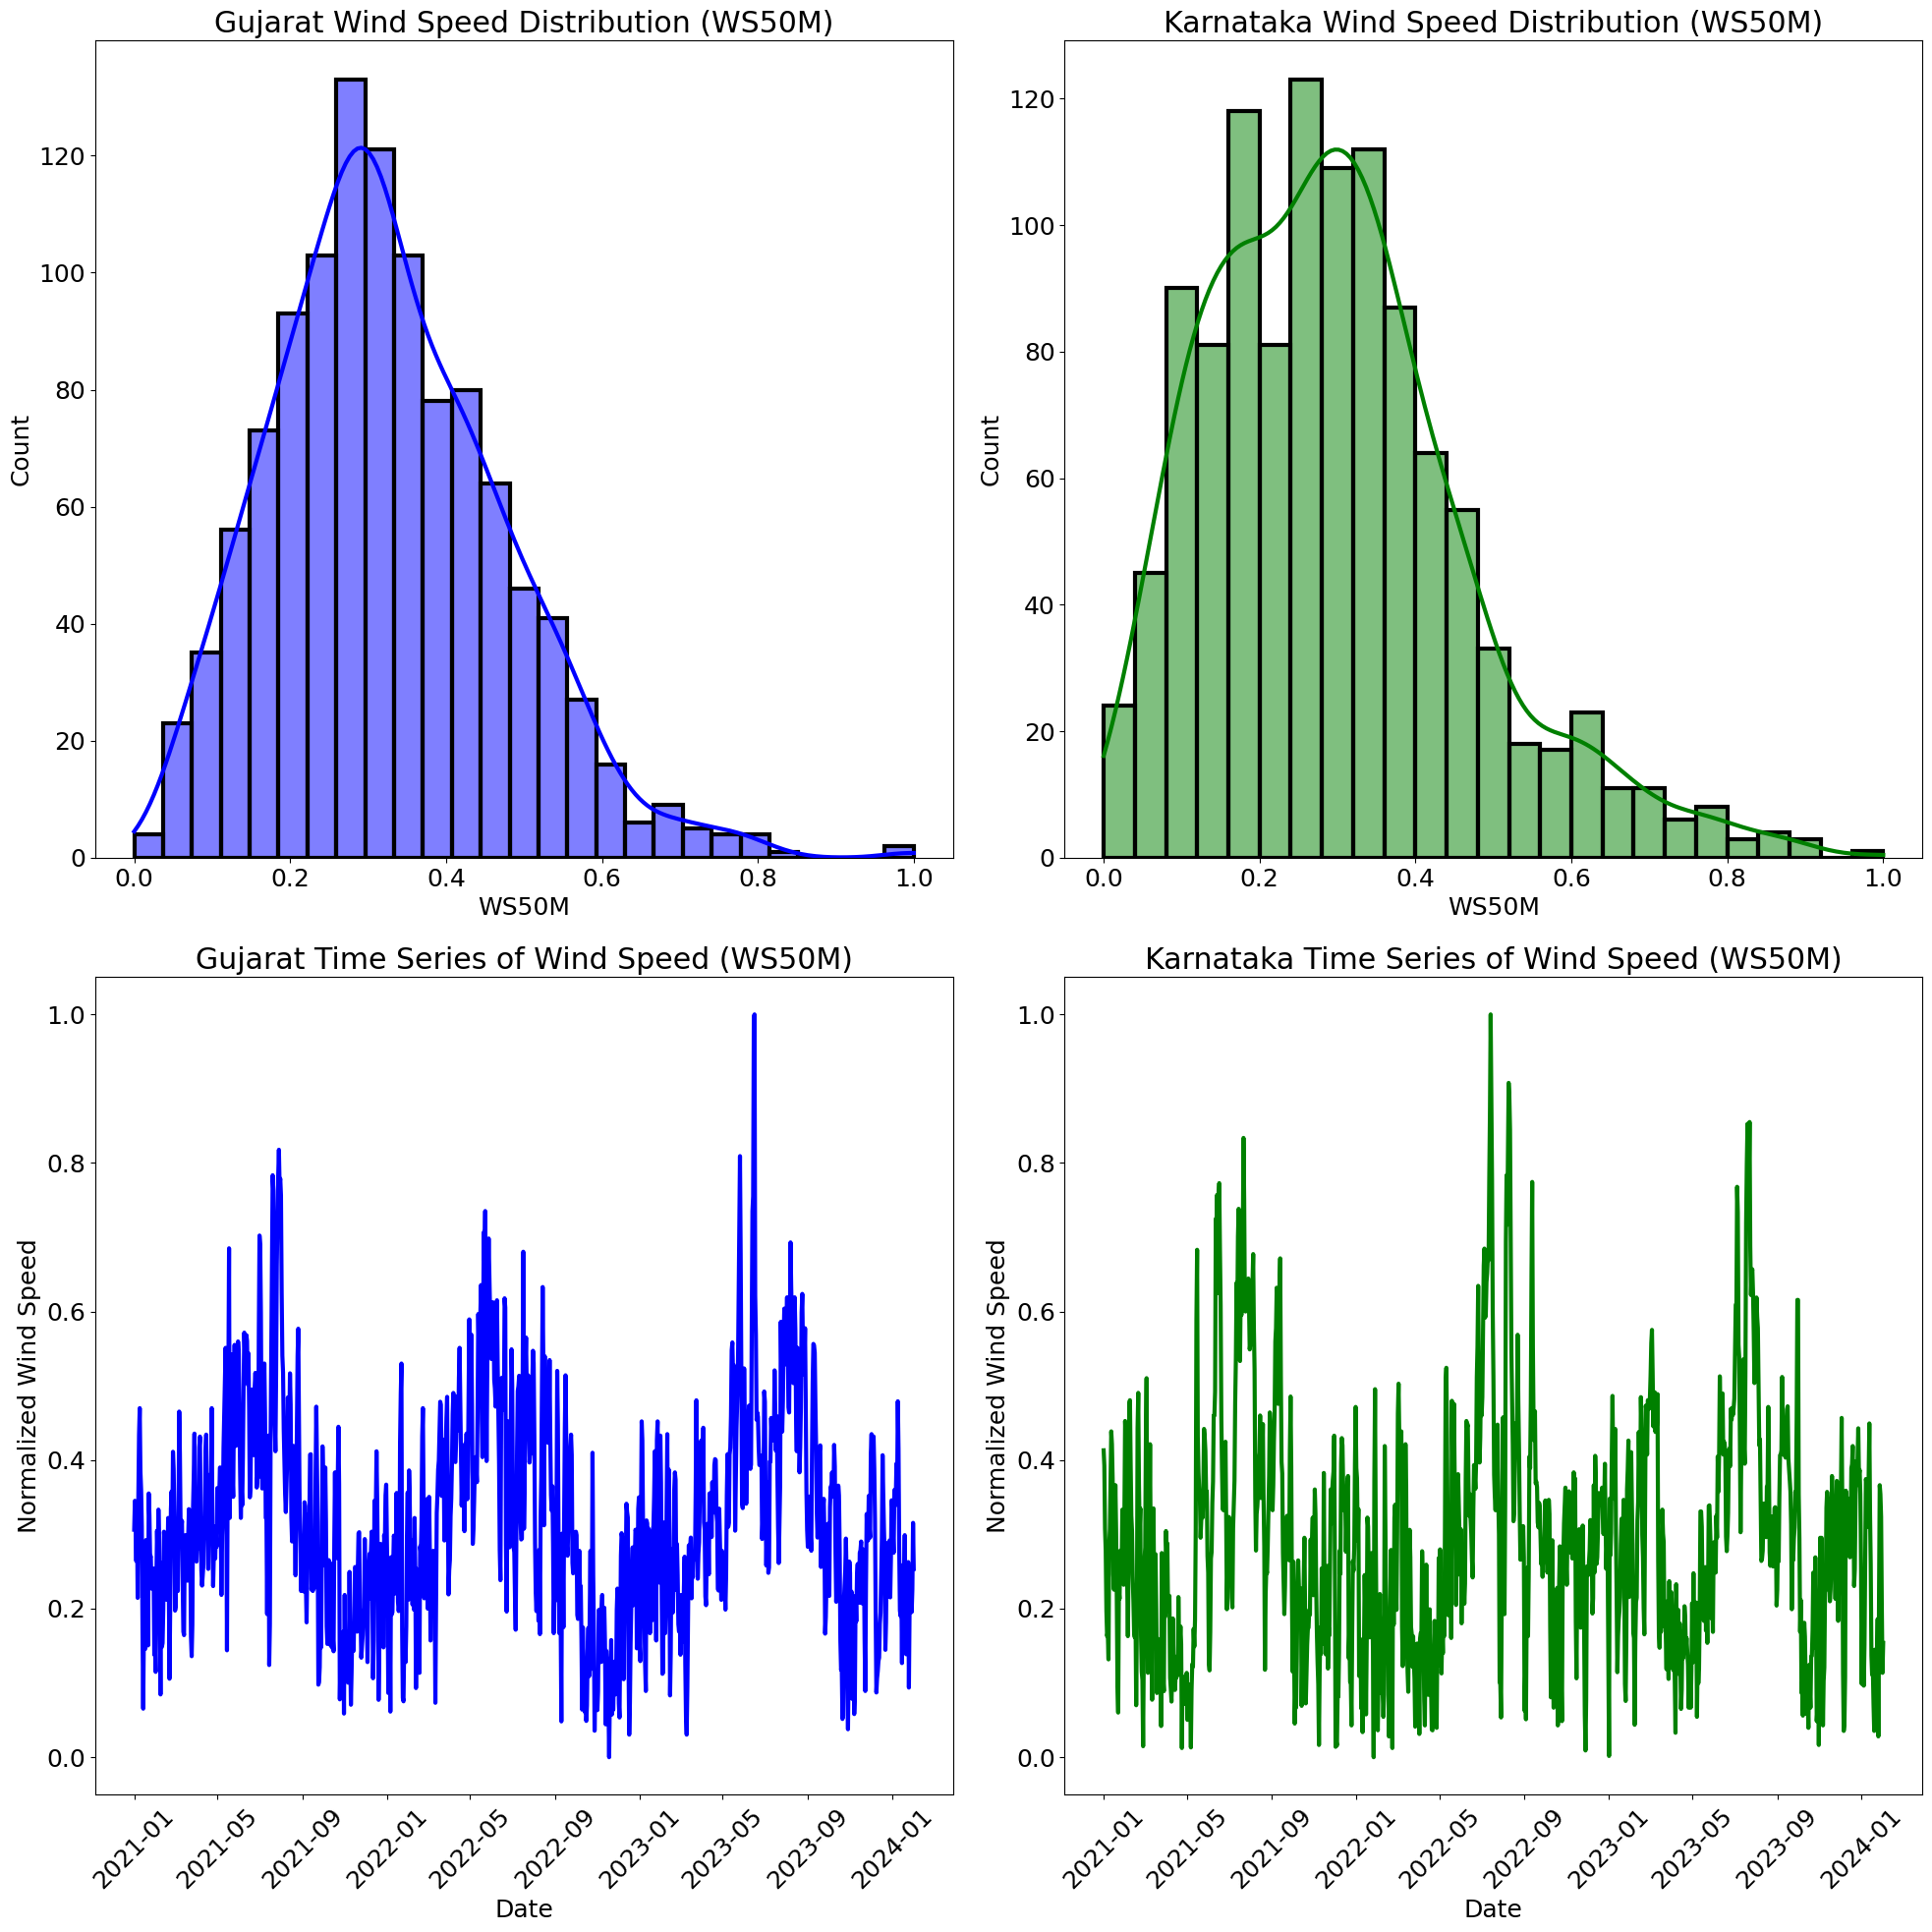

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust global settings for a larger font and line widths
plt.rcParams.update({'font.size': 18, 'lines.linewidth': 3})

# Setting up the figure for subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # Increase figure size for better readability
fig.subplots_adjust(hspace=0.5, wspace=0.4)

# Wind Speed Distribution for Gujarat with KDE for WS50M
sns.histplot(guj_df['WS50M'], ax=axes[0, 0], kde=True, color='blue', linewidth=3)
axes[0, 0].set_title('Gujarat Wind Speed Distribution (WS50M)')

# Wind Speed Distribution for Karnataka with KDE for WS50M
sns.histplot(krntk_df['WS50M'], ax=axes[0, 1], kde=True, color='green', linewidth=3)
axes[0, 1].set_title('Karnataka Wind Speed Distribution (WS50M)')

# Time Series of Wind Speed for Gujarat for WS50M
axes[1, 0].plot(guj_df['datetime'], guj_df['WS50M'], color='blue')
axes[1, 0].set_title('Gujarat Time Series of Wind Speed (WS50M)')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Normalized Wind Speed')
axes[1, 0].tick_params(axis='x', rotation=45)

# Time Series of Wind Speed for Karnataka for WS50M
axes[1, 1].plot(krntk_df['datetime'], krntk_df['WS50M'], color='green')
axes[1, 1].set_title('Karnataka Time Series of Wind Speed (WS50M)')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Normalized Wind Speed')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [10]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model for Gujarat
gbm_model_guj = GradientBoostingRegressor(random_state=42)
gbm_model_krntk = GradientBoostingRegressor(random_state=42) 

X_train_guj = X_train_guj.fillna(X_train_guj.median())
X_test_guj = X_test_guj.fillna(X_test_guj.median())

X_train_krntk = X_train_krntk.fillna(X_train_krntk.median())
X_test_krntk = X_test_krntk.fillna(X_test_krntk.median())
# Assuming X_train_guj and y_train_guj are your features and target variable for the Gujarat training set
gbm_model_guj.fit(X_train_guj, y_train_guj)
gbm_model_krntk.fit(X_train_krntk, y_train_krntk)
# Now you can safely make predictions
y_pred_guj = gbm_model_guj.predict(X_test_guj)
y_pred_guj = gbm_model_krntk.predict(X_test_krntk)
# And similarly, ensure you define and train gbm_model_krntk for Karnataka before making predictions 
# Predictions for Karnataka
y_pred_krntk = gbm_model_krntk.predict(X_test_krntk)

# Evaluation
mae_guj = mean_absolute_error(y_test_guj, y_pred_guj)
rmse_guj = mean_squared_error(y_test_guj, y_pred_guj, squared=False)
r2_guj = r2_score(y_test_guj, y_pred_guj)


mae_krntk = mean_absolute_error(y_test_krntk, y_pred_krntk)
rmse_krntk = mean_squared_error(y_test_krntk, y_pred_krntk, squared=False)
r2_krntk = r2_score(y_test_krntk, y_pred_krntk)

print("Gujarat - MAE: ", mae_guj, ", RMSE: ", rmse_guj, ", R2: ", r2_guj)
print("Karnataka - MAE: ", mae_krntk, ", RMSE: ", rmse_krntk, ", R2: ", r2_krntk)


Gujarat - MAE:  0.15926145517840842 , RMSE:  0.19226952205583178 , R2:  -0.866968338014608
Karnataka - MAE:  0.011196832920235579 , RMSE:  0.0139586755156688 , R2:  0.9927751980020475
